In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import os
# listar el sistema de archivos
import glob
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Model

#tf.random.set_seed(2019)

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:

(x,y), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

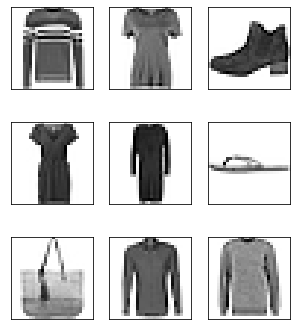

In [4]:
x_train = x
y_train = y
plt.figure(figsize=(5, 6))
for i in range(1, 10):
    plt.subplot(330 + i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[5 * i], cmap='Greys')

In [5]:
x_Train, x_Test = x_train / 255.0, x_test / 255.0

In [6]:
x_train = x_Train[..., tf.newaxis]
x_test = x_Test[..., tf.newaxis]

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train = tf.image.resize(x_train, size=[32,32])
x_test = tf.image.resize(x_test, size=[32,32])

In [9]:
x_train.shape

TensorShape([60000, 32, 32, 1])

In [10]:
# Se crea una instancia del modelo
base_model = tf.keras.applications.MobileNet(weights= None, include_top=False, input_shape=(32,32,1))
# se imprime la arquitectura del modelo
base_model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)  

In [11]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation= 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128   

In [13]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, batch_size = 32, epochs = 50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.6034 - accuracy: 0.7873
Epoch 2/50
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.4636 - accuracy: 0.8414
Epoch 3/50
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.4087 - accuracy: 0.8604
Epoch 4/50
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.3715 - accuracy: 0.8739
Epoch 5/50
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.3368 - accuracy: 0.8856
Epoch 6/50
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.3296 - accuracy: 0.8880
Epoch 7/50
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.2852 - accuracy: 0.9025
Epoch 8/50
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.2669 - accuracy: 0.9088
Epoch 9/50
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.2498 - accuracy: 0.9126
Epoch

In [20]:
model.evaluate(x_test, y_test, batch_size=64, verbose=1)

10000/10000 [==============================] - 2s 249us/sample - loss: 0.3453 - accuracy: 0.9124


[0.34528022744655607, 0.9124]

In [16]:
model.save_weights("fashion_mnist_weigths.hdf5")

In [17]:
model2 = Model(inputs = base_model.input, outputs = predictions)
model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.load_weights("fashion_mnist_weigths.hdf5", by_name=False)

In [19]:
model2.evaluate(x_test, y_test, batch_size=64, verbose=1)

10000/10000 [==============================] - 3s 281us/sample - loss: 0.3453 - accuracy: 0.9124


[0.34528022744655607, 0.9124]